In [32]:
from pap2 import *
import scipy.constants as c

## Aufgabe 1 a)

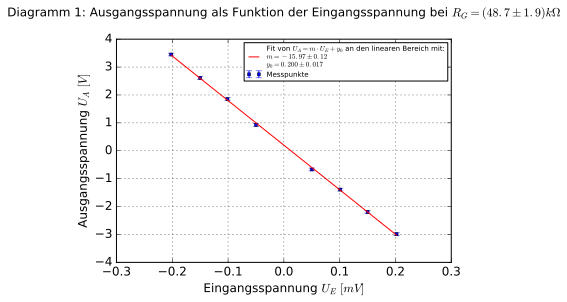

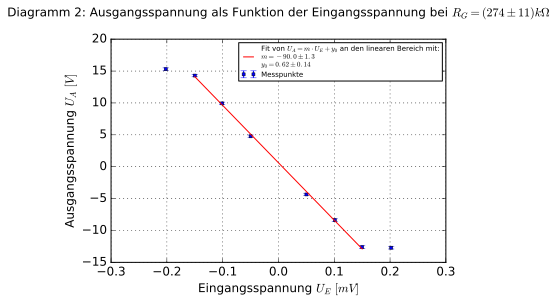

Gegenkoppelwiderstand $R \ [k\Omega]$,Verstärkung $V'_{exp}$,Verstärkung $V'_{theo}$
$48.7 \pm 1.9$,$15.97 \pm 0.12$,$16.2 \pm 0.6$
$274 \pm 11$,$90.0 \pm 1.3$,$91 \pm 4$


In [107]:
UA = zeros((2,8))
UE, UA[0], UA[1] = loadtxt("242\\1a.csv",delimiter=';',skiprows=1,unpack=True)

UE = UE*c.milli

UA = un.uarray(UA,[[0.05]*8,[0.2]*8])

sl = [slice(None,None),slice(1,-1)]

RE = 3
RG = array([48.7,274])
RG = un.uarray(RG,0.04*RG)
V = RG/RE

def fit_lin(x,m,y0):
    return x*m + y0

table = Table("Tabelle 1: Vergleich der Verstärkungen bei Gleichspannung")
table.field_names = [r"Gegenkoppelwiderstand $R \ [k\Omega]$","Verstärkung $V'_{exp}$","Verstärkung $V'_{theo}$"]
for i in range(UA.shape[0]):
    popt, pcov = curve_fit(fit_lin,UE[sl[i]],un.nominal_values(UA[i][sl[i]]),sigma=un.std_devs(UA[i][sl[i]]),p0=[-10**(-2),0])
    popt = un.uarray(popt,sqrt(diagonal(pcov)))
    
    table.add_row(pformat([RG[i],-popt[0],V[i]]))
    
    figure()
    errorbar(UE,un.nominal_values(UA[i]),yerr=un.std_devs(UA[i]),fmt='bs',label=r"Messpunkte")
    plot(UE[sl[i]],fit_lin(UE[sl[i]],*un.nominal_values(popt)),'r-',
         label='Fit von $U_A = m \\cdot U_E + y_0$ an den linearen Bereich mit:\n$m={0:L}$\n$y_0={1:L}$'.format(*popt))
    xlabel("Eingangsspannung $U_E \\ [mV]$")
    ylabel("Ausgangsspannung $U_A \\ [V]$")
    title("Diagramm {0}: Ausgangsspannung als Funktion der Eingangsspannung bei $R_G=({1:L})k\Omega$".format(i+1,RG[i]), y=1.08, fontsize=12)
    legend(loc=1, fontsize=7)
    grid()
    show()
display(HTML(table.get_html_string()))

## Aufgabe 1 b)

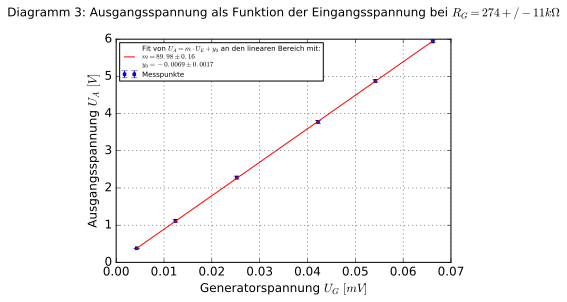

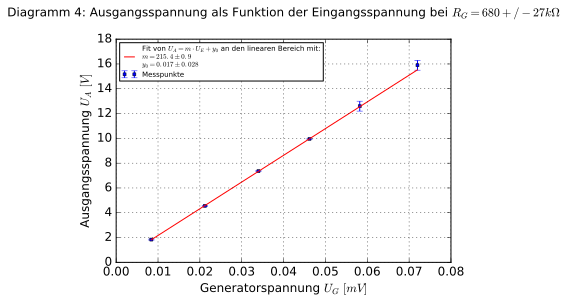

Gegenkoppelwiderstand $R \ [k\Omega]$,Verstärkung $V'_{exp}$,Verstärkung $V'_{theo}$
$274 \pm 11$,$89.98 \pm 0.16$,$91 \pm 4$
$680 \pm 27$,$215.4 \pm 0.9$,$227 \pm 9$


In [109]:
UE = zeros((2,6))
UA = zeros((2,6))
UE_, UA_ = loadtxt("242\\1b.csv",delimiter=';',skiprows=1,unpack=True)

UE = array([UE_[i*6:(i+1)*6] for i in range(2)])
UA = array([UA_[i*6:(i+1)*6] for i in range(2)])
UE = UE*c.milli/10

UA = un.uarray(UA,[[0.004,0.04,0.04,0.04,0.04,0.04],[0.04,0.04,0.04,0.04,0.4,0.4]])

sl = [slice(None,None),slice(None,None)]

RE = 3
RG = array([274,680])
RG = un.uarray(RG,0.04*RG)
V = RG/RE

# def fit_lin(x,m,y0):
#     return x*m + y0

table = Table("Tabelle 2: Vergleich der Verstärkungen bei Wechselspannung")
table.field_names = [r"Gegenkoppelwiderstand $R \ [k\Omega]$","Verstärkung $V'_{exp}$","Verstärkung $V'_{theo}$"]
for i in range(UA.shape[0]):
    popt, pcov = curve_fit(fit_lin,UE[i][sl[i]],un.nominal_values(UA[i][sl[i]]),sigma=un.std_devs(UA[i][sl[i]]))
    popt = un.uarray(popt,sqrt(diagonal(pcov)))
    
    table.add_row(pformat([RG[i],popt[0],V[i]]))
    
    figure()
    errorbar(UE[i],un.nominal_values(UA[i]),yerr=un.std_devs(UA[i]),fmt='bs',label=r"Messpunkte")
    plot(UE[i][sl[i]],fit_lin(UE[i][sl[i]],*un.nominal_values(popt)),'r-',
         label='Fit von $U_A = m \\cdot U_E + y_0$ an den linearen Bereich mit:\n$m={0:L}$\n$y_0={1:L}$'.format(*popt))
    xlabel("Generatorspannung $U_G\\ [mV]$")
    ylabel("Ausgangsspannung $U_A \\ [V]$")
    title("Diagramm {}: Ausgangsspannung als Funktion der Eingangsspannung bei $R_G={}k\Omega$".format(i+3,RG[i]),
          y=1.08, fontsize=12)
    legend(loc=2, fontsize=7)
    grid()
    show()
display(HTML(table.get_html_string()))

## Aufgabe 2

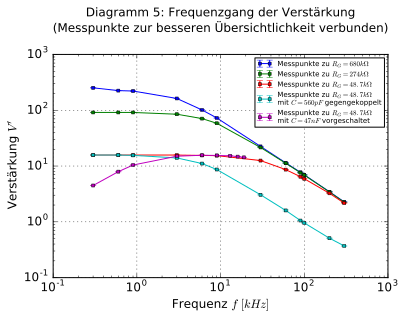

In [108]:
f = [[],[]]
UA = [[],[],[],[],[]]
f[0], UA[0], UA[1], UA[2], UA[3] = loadtxt("242\\2ab.csv",delimiter=';',skiprows=1,unpack=True)
f[1], UA[4] = loadtxt("242\\2c.csv",delimiter=';',skiprows=1,unpack=True)

dUA = [[i for j in [[0.02]*6,[0.002]*4,[0.0002]*2] for i in j],
       [i for j in [[0.02]*6,[0.002]*4,[0.0002]*2] for i in j],
       [i for j in [[0.02]*6,[0.002]*6] for i in j],
       [i for j in [[0.03]*4,[0.003]*4,[0.0003]*4] for i in j],
       [i for j in [[3]*9] for i in j]]
UA = [un.uarray(UA[i],dUA[i]) for i in range(len(UA))]
UA[-1] = UA[-1]*c.milli
UE = un.uarray([250,250,846,838,840],
               [2,2,5,6,6]) * c.milli/10
V = [UA[i]/UE[i] for i in range(len(UE))]

labels = ["Messpunkte zu $R_G=680k\Omega$","Messpunkte zu $R_G=274k\Omega$","Messpunkte zu $R_G=48.7k\Omega$",
          "Messpunkte zu $R_G=48.7k\Omega$\nmit $C=560pF$ gegengekoppelt",
          "Messpunkte zu $R_G=48.7k\Omega$\nmit $C=47nF$ vorgeschaltet"]

figure()
for i in range(len(V)):
    errorbar(f[i//4],un.nominal_values(V[i]),fmt='-s',yerr=un.std_devs(V[i]),label=labels[i])
xlabel("Frequenz $f \ [kHz]$")
ylabel("Verstärkung $V'$")
title("Diagramm 5: Frequenzgang der Verstärkung\n(Messpunkte zur besseren Übersichtlichkeit verbunden)",y=1.08, fontsize=12)
xscale('log')
yscale('log')
grid()
legend(fontsize=7)
show()